In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend
from keras_tqdm import TQDMNotebookCallback
from datetime import datetime

Using TensorFlow backend.


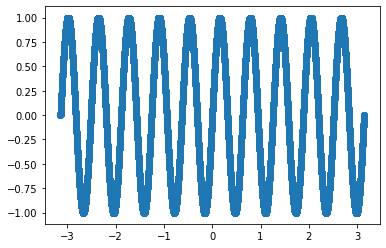

In [167]:
xrange=[-np.pi,np.pi]
period=0.2*np.pi
N=50000
x=np.random.rand(N)*(xrange[1]-xrange[0])+xrange[0]

def caly(x):
    return np.sin(x*(2*np.pi/period))
y=caly(x)
plt.scatter(x,y)

[-1.75929189  0.          1.44513262]
0.09424777960769379
3.1415563052133777
50000


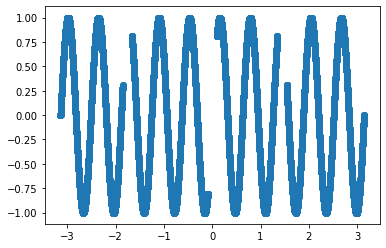

In [168]:
#adding holes
no_holes=3
hole_size_fraction=0.3
#hole_coords=np.random.rand(no_holes)*(xrange[1]-xrange[0])+xrange[0]
hole_coords=np.array([0.22,0.5,0.73])*(xrange[1]-xrange[0])+xrange[0]
print(hole_coords)
half_hole_size=period*hole_size_fraction/2
print(half_hole_size)
x=np.random.rand(N)*(xrange[1]-xrange[0]-no_holes*2*half_hole_size)+xrange[0]
for hole in hole_coords:
    for i,xi in enumerate(x):
        if xi>hole-half_hole_size:
            x[i]+=2*half_hole_size
print(max(x))
y=caly(x)
x_squared=x**2
print(len(x))
length=len(x)
plt.scatter(x,y)

In [177]:
xtestrange=xrange
x_test=np.linspace(0,1,1000)*(xtestrange[1]-xtestrange[0])+xtestrange[0]
y_test=caly(x_test)

In [216]:
New_model=True
no_layers=4
no_nodes=16
if New_model:
    inputs=keras.Input(shape=(2,))
    xx=keras.layers.Dense(no_nodes,activation='relu')(inputs)
    for i in range(no_layers-1):
        xx=keras.layers.Dense(no_nodes,activation='relu')(xx)
        #xx=keras.layers.Dropout(0.05)
        #xx=keras.layers.Dense(no_nodes,activation='relu',kernel_regularizer=keras.regularizers.l1(0.001))(xx)
    outputs=keras.layers.Dense(1,activation='linear')(xx)
    model = keras.Model(inputs=inputs, outputs=outputs)
else:
    model = keras.models.load_model('sine_model.h5')
model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_102 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_103 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_104 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_105 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 17        
Total params: 881
Trainable params: 881
Non-trainable params: 0
____________________________________________________________

In [217]:
optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,loss='MAE')

In [218]:
epoch_no=50000
class showProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % int(epoch_no/100) == 0:
            percent= int(np.round((epoch/int(epoch_no/100)),0))
            time=datetime.now()
            time_lapsed = (time-start_time)
            print(str(percent)+'% | epoch='+str(epoch)+'/'+str(epoch_no)+' | now='+str(time)[:-7]+
                  ' | time lapsed='+str(time_lapsed)[:-7]+' | loss='+str(np.round(logs['loss'],5)))

start_time=datetime.now()
#history=model.fit(np.array([x,x_squared]).T,y,epochs=10000,batch_size=N,verbose=1)
history=model.fit(np.array([x,x_squared]).T,y,
                  epochs=epoch_no,
                  batch_size=N,
                  #validation_data=(np.array([x_test,x_test**2]).T,y_test),
                  verbose=0,
                  callbacks=[showProgress()])
print('training done! now='+str(datetime.now())+' | Time lapsed='+str(datetime.now()-start_time))
model.save('sine_model.h5')

0% | epoch=0/50000 | now=2019-11-07 01:38:54 | time lapsed=0:00:02 | loss=0.63181
1% | epoch=500/50000 | now=2019-11-07 01:39:05 | time lapsed=0:00:12 | loss=0.39573
2% | epoch=1000/50000 | now=2019-11-07 01:39:16 | time lapsed=0:00:23 | loss=0.33759
3% | epoch=1500/50000 | now=2019-11-07 01:39:27 | time lapsed=0:00:34 | loss=0.30581
4% | epoch=2000/50000 | now=2019-11-07 01:39:37 | time lapsed=0:00:44 | loss=0.29781
5% | epoch=2500/50000 | now=2019-11-07 01:39:47 | time lapsed=0:00:54 | loss=0.2923
6% | epoch=3000/50000 | now=2019-11-07 01:39:57 | time lapsed=0:01:04 | loss=0.28756
7% | epoch=3500/50000 | now=2019-11-07 01:40:07 | time lapsed=0:01:14 | loss=0.28471
8% | epoch=4000/50000 | now=2019-11-07 01:40:20 | time lapsed=0:01:27 | loss=0.28126
9% | epoch=4500/50000 | now=2019-11-07 01:40:31 | time lapsed=0:01:38 | loss=0.27988
10% | epoch=5000/50000 | now=2019-11-07 01:40:41 | time lapsed=0:01:48 | loss=0.27366
11% | epoch=5500/50000 | now=2019-11-07 01:40:52 | time lapsed=0:01:5

94% | epoch=47000/50000 | now=2019-11-07 01:55:14 | time lapsed=0:16:21 | loss=0.03544
95% | epoch=47500/50000 | now=2019-11-07 01:55:24 | time lapsed=0:16:31 | loss=0.04297
96% | epoch=48000/50000 | now=2019-11-07 01:55:34 | time lapsed=0:16:41 | loss=0.03518
97% | epoch=48500/50000 | now=2019-11-07 01:55:44 | time lapsed=0:16:51 | loss=0.04488
98% | epoch=49000/50000 | now=2019-11-07 01:55:54 | time lapsed=0:17:01 | loss=0.03629
99% | epoch=49500/50000 | now=2019-11-07 01:56:04 | time lapsed=0:17:11 | loss=0.04272
training done! now=2019-11-07 01:56:14.411949 | Time lapsed=0:17:21.457068


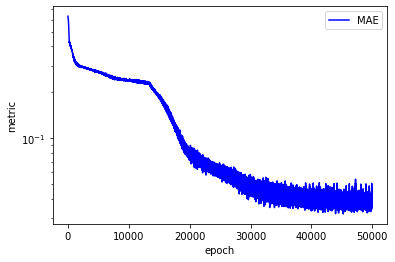

In [222]:
epoch = history.epoch
hist=history.history
#MAE,valMSE=hist['MAE'],hist['val_MAE']
MAE=hist['loss']
plt.plot(epoch,MAE,'b-',label='MAE')
#plt.plot(epoch,MSE,'b--',label='MSE')
#plt.plot(epoch,valMAE,'r-',label='valMAE')
#plt.plot(epoch,valMSE,'r--',label='valMSE')
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('metric')
plt.legend()
plt.show()

In [223]:
model.evaluate(np.array([x_test,x_test**2]).T,y_test,verbose=2)

1000/1 - 0s - loss: 0.0574


0.047396275952458385

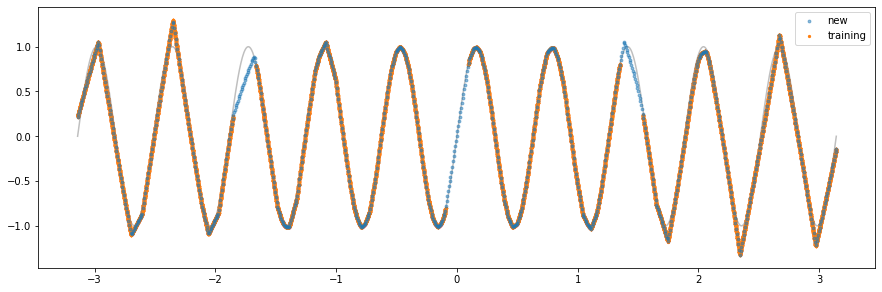

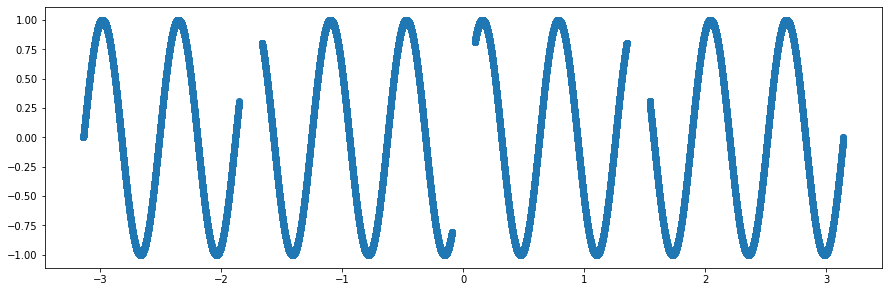

In [224]:
predictions=model.predict(np.array([x_test,x_test**2]).T,verbose=0)
#plt.scatter(x_test,y_test)
plt.figure(figsize=[15,4.8])
plt.scatter(x_test,predictions,s=8,label='new',alpha=0.5)
orig=model.predict(np.array([x,x_squared]).T,verbose=0)
plt.scatter(x,orig,s=5,zorder=-1,label='training')
xreg=np.linspace(*xrange,1000)
plt.plot(xreg,caly(xreg),zorder=-1,color='grey',alpha=0.5)
plt.legend()
plt.show()
plt.figure(figsize=[15,4.8])
plt.scatter(x,y)
plt.show()